<a href="https://colab.research.google.com/github/mimomaina/Job_market_trend_analysis/blob/main/Job_market_datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Basic packages

In [ ]:
import pandas as pd
import numpy as np


# Load dataset

In [ ]:
df = pd.read_csv('/content/job_descriptions.csv', engine='python', on_bad_lines='skip')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502792 entries, 0 to 1502791
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1502792 non-null  int64  
 1   Experience        1502792 non-null  object 
 2   Qualifications    1502792 non-null  object 
 3   Salary Range      1502792 non-null  object 
 4   location          1502792 non-null  object 
 5   Country           1502792 non-null  object 
 6   latitude          1502792 non-null  float64
 7   longitude         1502792 non-null  float64
 8   Work Type         1502792 non-null  object 
 9   Company Size      1502792 non-null  int64  
 10  Job Posting Date  1502792 non-null  object 
 11  Preference        1502792 non-null  object 
 12  Contact Person    1502792 non-null  object 
 13  Contact           1502792 non-null  object 
 14  Job Title         1502792 non-null  object 
 15  Role              1502792 non-null  object 
 16  

# Data Cleaning

# **1. Drop irrelevant columns**

In [ ]:
df.drop('Job Id', axis=1, inplace=True)

In [ ]:
df.drop('Company',axis=1, inplace=True)

In [ ]:
df.drop('location',axis=1, inplace=True)

In [ ]:
df.drop('longitude',axis=1, inplace=True)

In [ ]:
df.drop('Contact Person',axis=1, inplace=True)

In [ ]:
df.drop('Job Portal',axis=1, inplace=True)

In [ ]:
df.drop('latitude',axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502792 entries, 0 to 1502791
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Experience        1502792 non-null  object
 1   Qualifications    1502792 non-null  object
 2   Salary Range      1502792 non-null  object
 3   Country           1502792 non-null  object
 4   Work Type         1502792 non-null  object
 5   Company Size      1502792 non-null  int64 
 6   Job Posting Date  1502792 non-null  object
 7   Preference        1502792 non-null  object
 8   Contact           1502792 non-null  object
 9   Job Title         1502792 non-null  object
 10  Role              1502792 non-null  object
 11  Job Description   1502792 non-null  object
 12  Benefits          1502792 non-null  object
 13  skills            1502792 non-null  object
 14  Responsibilities  1502792 non-null  object
 15  Company Profile   1497690 non-null  object
dtypes: int64(1), objec

# 2.Correct data types

In [ ]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')


 invalid dates are converted to NaT

# 3.Check for duplicates

In [ ]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")


Total duplicate rows: 0


## 4. Create Column( Job Automation Type)

In [ ]:
# 1️⃣ Extract unique job titles
unique_titles = df['Job Title'].dropna().unique()

# 2️⃣ Count occurrences of each job title
title_counts = df['Job Title'].value_counts()

# 3️⃣ Sample a subset (most frequent + random)
sample_size = 20  # Adjust based on what you want to review
most_common_titles = title_counts.head(sample_size).index.tolist()  # Top 20 most frequent
random_titles = df['Job Title'].dropna().sample(sample_size, random_state=42).unique().tolist()  # 20 random samples

# 4️⃣ Display findings
print("Total Unique Job Titles:", len(unique_titles))
print("\nMost Common Job Titles:", most_common_titles)
print("\nRandom Sampled Job Titles:", random_titles)


Total Unique Job Titles: 147

Most Common Job Titles: ['UX/UI Designer', 'Digital Marketing Specialist', 'Software Engineer', 'Network Engineer', 'Software Tester', 'Executive Assistant', 'Financial Advisor', 'Procurement Manager', 'Sales Representative', 'Social Media Manager', 'Network Administrator', 'Administrative Assistant', 'Data Analyst', 'Event Planner', 'HR Coordinator', 'Procurement Specialist', 'Purchasing Agent', 'Systems Administrator', 'Customer Support Specialist', 'Legal Assistant']

Random Sampled Job Titles: ['Procurement Specialist', 'Customer Service Representative', 'Customer Success Manager', 'Software Engineer', 'Email Marketing Specialist', 'Legal Advisor', 'Brand Ambassador', 'Digital Marketing Specialist', 'HR Generalist', 'SEM Specialist', 'UX/UI Designer', 'Event Coordinator', 'Financial Analyst', 'Product Designer', 'Technical Writer', 'Office Manager', 'Data Analyst']


In [ ]:
def classify_ai_replaceability(row):
    title = str(row['Job Title']).lower()
    description = str(row['Job Description']).lower()


    # Check for high AI replaceability first
    if any(keyword.lower() in title or keyword.lower() in description for keyword in
           ['Data Entry', 'Customer Support', 'Telemarketer', 'Bookkeeper', 'Transcription', 'Paralegal',
            'Market Research', 'Junior Developer', 'Content Writer', 'SEO', 'Copywriter', 'Proofreader',
            'Translator', 'Retail Assistant','Social Media Manager', 'HR Coordinator', 'Purchasing Agent', 'Event Planner',
            'Email Marketing Specialist', 'Marketing Analyst', 'QA Analyst', 'Sales Representative',
            'Accountant', 'Sales Consultant','Customer Support Specialist', 'Administrative Assistant', 'Data Entry Clerk', 'Copywriter',
            'Marketing Coordinator', 'SEO Specialist', 'SEM Specialist', 'Technical Writer', 'Legal Assistant','Purchasing Agent', 'HR Coordinator', 'Paralegal',
            'Legal Secretary', 'Customer Service Representative', 'Sales Associate', 'Procurement Coordinator','Sales Representative', 'Project Coordinator', 'Marketing Coordinator']):
        return 'Easily Automatable'

    # Check for partial AI replaceability
    elif any(keyword.lower() in title or keyword.lower() in description for keyword in
             ['Software Engineer', 'Digital Marketing', 'Data Analyst', 'HR Manager', 'UX/UI Designer',
              'Investment Analyst', 'Financial Planner', 'Operations Manager', 'Legal Analyst', 'Product Manager',
              'E-commerce Manager', 'Healthcare Consultant', 'Cybersecurity', 'Fraud Detection', 'Recruiter',
              'Network Engineer', 'Software Tester', 'Financial Advisor', 'Procurement Manager',
              'Network Administrator', 'Systems Administrator', 'Procurement Specialist',
             'Graphic Designer', 'Account Manager', 'Project Manager', 'Investment Banker',
             'Supply Chain Manager', 'Civil Engineer', 'Brand Manager', 'Front-End Developer','Network Security Specialist'
             'Public Relations Specialist', 'IT Support Specialist', 'Software Architect',
              'Business Development Manager', 'Business Analyst', 'Chemical Engineer', 'Structural Engineer',
            'Research Scientist','Database Administrator','Front-End Engineer','IT Manager',
            'UX/UI Designer', 'Digital Marketing Specialist', 'Software Engineer', 'Data Analyst',
            'Marketing Manager', 'Operations Manager', 'Project Coordinator', 'Research Analyst',
            'Java Developer', 'Investment Analyst', 'Financial Analyst', 'HR Manager', 'Marketing Director',
            'Finance Manager', 'Systems Analyst', 'Network Technician', 'Back-End Developer', 'Web Developer',
            'Sales Representative', 'Event Planner', 'IT Support Specialist', 'Front-End Developer','Financial Advisor',
            'Network Administrator', 'Systems Administrator', 'Accountant','Software Developer','Network Analyst'
            'Account Executive', 'Tax Consultant', 'Software Architect', 'Database Administrator',
            'Sales Consultant', 'Financial Planner', 'Investment Advisor', 'IT Administrator',
            'HR Generalist', 'Financial Controller', 'Account Director','Event Coordinator', 'Copywriter', 'Technical Writer',
    '       Brand Ambassador', 'Marketing Director', 'Mechanical Designer', 'Network Technician']):
        return 'Semi-Automatable'

    # Check for jobs that are hard to automate
    elif any(keyword.lower() in title or keyword.lower() in description for keyword in
             ['Psychologist', 'Therapist', 'Doctor', 'Nurse', 'Teacher', 'Professor', 'Artist', 'Musician',
              'Journalist', 'Screenwriter', 'Executive', 'CEO', 'Public Speaker', 'Athlete', 'Social Worker',
              'Plumber', 'Electrician', 'Mechanic', 'Lawyer', 'Judge', 'Human Rights Advocate', 'Diplomat', 'Ethicist',
               'Architect', 'Landscape Architect', 'Litigation Attorney',
            'UX Researcher', 'Interior Designer', 'Data Engineer', 'Urban Planner',
            'Physician Assistant', 'Veterinarian', 'Substance Abuse Counselor', 'Tax Consultant',
            'Aerospace Engineer', 'Quality Assurance Analyst', 'Office Manager', 'Legal Advisor',
            'Pharmaceutical Sales Representative', 'Environmental Consultant', 'Chemical Analyst',
            'Electrical Engineer',  'Executive Assistant', 'Mechanical Engineer', 'Customer Success Manager', 'Brand Ambassador',
            'Occupational Therapist', 'Teacher', 'Social Worker', 'Art Teacher', 'Art Director',
            'Pediatrician', 'Psychologist', 'Speech Therapist', 'Physical Therapist', 'Registered Nurse',
            'Family Nurse Practitioner', 'Nurse Practitioner', 'Nurse Manager', 'Dental Hygienist',
            'Legal Counsel', 'Family Lawyer', 'Architectural Designer', 'Mechanical Designer',
            'Veterinarian', 'Physician Assistant', 'Public Relations Specialist','Architect',
            'Litigation Attorney', 'Graphic Designer', 'Content Writer',
            'Investment Banker', 'Landscape Architect', 'UX Researcher', 'Substance Abuse Counselor',
            'Legal Advisor', 'Interior Designer', 'Urban Planner', 'Pharmaceutical Sales Representative',
            'Environmental Consultant', 'Electrical Designer', 'Research Scientist', 'Data Scientist',
            'Web Designer', 'Social Media Coordinator', 'Landscape Designer', 'Wedding Planner',
            'Product Designer','UX/UI Designer', 'Pediatrician', 'Dental Hygienist', 'Veterinarian',
            'Art Director', 'Social Worker', 'Psychologist', 'Legal Counsel',
            'Architectural Designer']):
        return 'Hard-to-Automate'

    return 'Unknown'

# Apply to DataFrame
df['Job Automation Type'] = df.apply(classify_ai_replaceability, axis=1)


In [ ]:
# Filter rows where Job Automation Type is 'Unknown'
unknown_jobs = df[df['Job Automation Type'] == 'Unknown']['Job Title'].value_counts()

# Display the most common unknown job titles
print(unknown_jobs.head(60))  # Adjust number as needed


Job Title
Sales Manager                  9655
Network Security Specialist    6494
Systems Engineer               6452
Customer Service Manager       6427
Database Developer             6427
Human Resources Manager        6312
Marketing Specialist           3352
Market Analyst                 3288
Network Analyst                3265
Process Engineer               3262
Supply Chain Analyst           3257
Event Manager                  3240
QA Engineer                    3192
Environmental Engineer         3173
Inventory Analyst              3098
Name: count, dtype: int64


In [ ]:
#display number od values that fall under 'unknown' in Job Automation column
df['Job Automation Type'].value_counts()

,count
Job Automation Type,
Semi-Automatable,603222
Hard-to-Automate,446774
Easily Automatable,381902
Unknown,70894


In [ ]:
#display values in Job Automation Type
df['Job Automation Type']

,Job Automation Type
0,Easily Automatable
1,Semi-Automatable
2,Semi-Automatable
3,Semi-Automatable
4,Unknown
...,...
1502787,Semi-Automatable
1502788,Hard-to-Automate
1502789,Hard-to-Automate
1502790,Semi-Automatable


In [ ]:
# Filter rows where Job Automation Type is 'Unknown'
unknown_jobs = df[df['Job Automation Type'] == 'Unknown']['Job Title'].value_counts()

# Display the most common unknown job titles
print(unknown_jobs.head(60))  # Adjust number as needed


Job Title
Sales Manager                  9655
Network Security Specialist    6494
Systems Engineer               6452
Customer Service Manager       6427
Database Developer             6427
Human Resources Manager        6312
Marketing Specialist           3352
Market Analyst                 3288
Network Analyst                3265
Process Engineer               3262
Supply Chain Analyst           3257
Event Manager                  3240
QA Engineer                    3192
Environmental Engineer         3173
Inventory Analyst              3098
Name: count, dtype: int64


In [ ]:
# Define automation categories
def classify_job_automation(job_title):
    job_title = job_title.lower()

    # High automation risk (Routine, Repetitive, Structured)
    high_automation = [
        "inventory analyst", "market analyst", "supply chain analyst", "database developer",
        "network analyst", "qa engineer", "process engineer"
    ]

    # Medium automation risk (Some automation but requires human oversight)
    medium_automation = [
        "sales manager", "customer service manager", "event manager",
        "marketing specialist", "environmental engineer", "network security specialist",
        "systems engineer"
    ]

    # Low automation risk (Requires creativity, critical thinking, or human interaction)
    low_automation = [
        "human resources manager"
    ]

    # Assign automation level
    if job_title in high_automation:
        return "Hard-to-Automate"
    elif job_title in medium_automation:
        return "Semi-Automatable"
    elif job_title in low_automation:
        return "Easily Automatable"
    else:
        return "Unknown"

# Apply only to unknown values
df.loc[df["Job Automation Type"] == "Unknown", "Job Automation Type"] = df["Job Title"].apply(classify_job_automation)

# Check results
df["Job Automation Type"].value_counts()


,count
Job Automation Type,
Semi-Automatable,642015
Hard-to-Automate,472563
Easily Automatable,388214


In [ ]:
#display number od values that fall under 'unknown' in Job Automation column
df['Job Automation Type'].value_counts()

,count
Job Automation Type,
Semi-Automatable,642015
Hard-to-Automate,472563
Easily Automatable,388214


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502792 entries, 0 to 1502791
Data columns (total 20 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Experience                      1502792 non-null  object        
 1   Qualifications                  1502792 non-null  object        
 2   Salary Range                    1502792 non-null  object        
 3   Country                         1502792 non-null  object        
 4   Work Type                       1502792 non-null  object        
 5   Company Size                    1502792 non-null  int64         
 6   Job Posting Date                1502792 non-null  datetime64[ns]
 7   Preference                      1502792 non-null  object        
 8   Contact                         1502792 non-null  object        
 9   Job Title                       1502792 non-null  object        
 10  Role                            1502792 no

# 5.Create Column(Industry)

In [ ]:
import pandas as pd

# Expanded keyword-based mapping to industries
keywords_to_industry = {
    'python': 'Technology',
    'sql': 'Technology',
    'machine learning': 'Technology',
    'cloud': 'Technology',
    'data': 'Technology',
    'network': 'Technology',

    'finance': 'Finance',
    'investment': 'Finance',
    'banking': 'Finance',
    'accounting': 'Finance',
    'budget': 'Finance',

    'hr': 'Human Resources',
    'recruiting': 'Human Resources',

    'marketing': 'Marketing',
    'advertising': 'Marketing',
    'seo': 'Marketing',
    'social media': 'Marketing',

    'health': 'Healthcare',
    'medical': 'Healthcare',
    'hospital': 'Healthcare',
    'therapy': 'Healthcare',
    'nurse': 'Healthcare',
    'doctor': 'Healthcare',

    'construction': 'Engineering',
    'civil': 'Engineering',
    'mechanical': 'Engineering',
    'electrical': 'Engineering',

    'project': 'Management',
    'operations': 'Management',
    'strategy': 'Management',

    'education': 'Education',
    'teaching': 'Education',

    'art': 'Creative Arts',
    'music': 'Creative Arts',
    'writing': 'Creative Arts'
}

# Function to assign industry based on job title and description
def classify_industry(row):
    job_title = str(row['Job Title']).lower()
    job_desc = str(row['Job Description']).lower()

    # Check job title first
    for keyword, industry in keywords_to_industry.items():
        if keyword in job_title:
            return industry

    # Check job description as a fallback
    for keyword, industry in keywords_to_industry.items():
        if keyword in job_desc:
            return industry

    return 'Unknown'  # Default if no match is found

#df = pd.read_csv("/content/job_descriptions.csv", usecols=["Job Title", "Job Description"])


# Apply classification function
df['Industry'] = df.apply(classify_industry, axis=1)

# Save the updated dataset
df.to_csv("classified_by_job_title_and_description.csv", index=False)

print("Industry classification using both job title and job description completed!")


Industry classification using both job title and job description completed!


In [ ]:
import pandas as pd
import re

def classify_industry(job_title, job_description):
    industry_mapping = {
        "Tech": ["Software Engineer", "Data Scientist", "Web Developer", "Cybersecurity", "Cloud Engineer", "Network Administrator", "AI", "Machine Learning", "DevOps", "Python", "Java", "C++", "AWS", "Azure", "GCP", "Certified Ethical Hacker", "CompTIA", "CCNA", "CCNP"],
        "Finance": ["Investment Banker", "Financial Analyst", "Accountant", "Auditor", "Tax Consultant", "CFA", "CPA", "Financial Planner", "Risk Analyst", "Banking", "Stock Market", "Trading"],
        "Healthcare": ["Doctor", "Nurse", "Psychologist", "Therapist", "Pediatrician", "Veterinarian", "Medical Research", "Pharmacist", "Dentist", "Emergency Medicine", "Surgery", "Radiologist", "Oncologist", "Physician Assistant", "Registered Nurse", "Healthcare Consultant"],
        "Marketing": ["SEO", "Marketing Specialist", "Content Writer", "Social Media Manager", "Brand Manager", "Email Marketing", "Digital Marketing", "Market Analyst", "Advertising", "Public Relations", "Copywriting", "Google Ads", "Facebook Ads"],
        "Engineering": ["Mechanical Engineer", "Electrical Engineer", "Civil Engineer", "Structural Engineer", "Process Engineer", "QA Engineer", "Aerospace Engineer", "Chemical Engineer", "Manufacturing", "Robotics", "AutoCAD", "SolidWorks"],
        "Education": ["Teacher", "Professor", "Lecturer", "Tutor", "Educator", "Curriculum Developer", "Academic Researcher", "Training Coordinator", "Instructional Designer"],
        "Legal": ["Lawyer", "Judge", "Legal Analyst", "Paralegal", "Attorney", "Litigation", "Corporate Law", "Intellectual Property", "Contract Law", "Legal Counsel", "Compliance Officer"],
        "Business": ["HR Manager", "Project Manager", "Operations Manager", "Business Analyst", "Sales Manager", "Account Executive", "Recruiter", "Business Development", "Management Consultant", "Entrepreneur"],
        "Retail & Sales": ["Retail Assistant", "Sales Representative", "Telemarketer", "Customer Service", "Account Manager", "E-commerce Manager", "Purchasing Agent", "Store Manager"],
        "Creative & Design": ["Graphic Designer", "UX/UI Designer", "Product Designer", "Interior Designer", "Fashion Designer", "Architect", "Illustrator", "Photographer", "Brand Ambassador", "Wedding Planner"],
        "Research & Science": ["Research Scientist", "Environmental Scientist", "Biologist", "Chemist", "Physicist", "Lab Technician", "Academic Research", "Data Analyst"]
    }

    matched_industries = set()

    for industry, keywords in industry_mapping.items():
        for keyword in keywords:
            if re.search(rf'\b{re.escape(keyword)}\b', job_title, re.IGNORECASE) or \
               re.search(rf'\b{re.escape(keyword)}\b', job_description, re.IGNORECASE):
                matched_industries.add(industry)

    return " | ".join(matched_industries) if matched_industries else "Unknown"



# Apply classification
df["Industry"] = df.apply(lambda row: classify_industry(row["Job Title"], row["Job Description"]), axis=1)



In [ ]:
#display number of values in I ndustry
df['Industry'].value_counts()

,count
Industry,
Unknown,245181
Tech,174536
Marketing,139271
Creative & Design,132876
Healthcare,116502
Operations & Supply Chain,90144
Retail & Sales,77936
Business,74176
Engineering,73925


In [ ]:
#Job Title counts of rows in Industry that are Unknown
df[df['Industry'] == 'Unknown']['Job Title'].value_counts()
#view last 16



,count
Job Title,
Administrative Assistant,16323
Project Coordinator,12857
Substance Abuse Counselor,9821
HR Coordinator,9711
Technical Writer,9688
Art Director,9674
Executive Assistant,9674
Marketing Analyst,9649
Electrical Designer,9628


In [ ]:
import pandas as pd
import re



# Define industry mapping with expanded keywords, tools, and certifications
industry_keywords = {
    "Tech": [
        "software", "developer", "programmer", "engineer", "AI", "ML", "data science", "cybersecurity",
        "networking", "cloud computing", "AWS", "Azure", "GCP", "Python", "Java", "SQL", "React", "DevOps",
        "blockchain", "full-stack", "backend", "frontend", "UI/UX", "big data", "database", "Linux"
    ],
    "Finance": [
        "investment", "financial planning", "accounting", "banking", "audit", "risk management", "taxation",
        "CFA", "CPA", "hedge fund", "wealth management", "trading", "fintech", "capital markets", "equity",
        "fraud detection", "portfolio management", "budgeting", "forecasting", "compliance"
    ],
    "Healthcare": [
        "nurse", "physician", "medical", "therapist", "mental health", "hospital", "clinical", "surgery",
        "radiology", "oncology", "cardiology", "dentist", "patient care", "pediatrics", "pharmacy",
        "epidemiology", "diagnostic", "rehabilitation", "telemedicine", "public health"
    ],
    "Marketing & Sales": [
        "SEO", "social media", "digital marketing", "brand management", "advertising", "copywriting",
        "market research", "sales strategy", "email marketing", "public relations", "influencer", "PPC",
        "customer acquisition", "content strategy", "campaign management"
    ],
    "Operations & Supply Chain": [
        "logistics", "procurement", "supply chain", "inventory", "vendor management", "operations",
        "warehouse", "manufacturing", "quality assurance", "lean", "six sigma", "production planning"
    ],
    "Legal": [
        "lawyer", "attorney", "paralegal", "litigation", "corporate law", "contract law", "intellectual property",
        "compliance", "legal research", "court", "arbitration", "mediation", "jurisprudence"
    ],
    "Research & Science": [
        "scientist", "researcher", "data analyst", "lab technician", "experimental", "clinical trials",
        "biotechnology", "bioinformatics", "chemistry", "physics", "environmental research", "genetics"
    ],
    "Customer Service": [
        "customer service", "client relations", "support specialist", "call center", "helpdesk", "technical support",
        "customer satisfaction", "customer success", "CRM", "troubleshooting"
    ]
}

# Function to classify industry based on job title and description
def classify_industry(job_title, job_description):
    combined_text = f"{job_title} {job_description}".lower()  # Convert to lowercase for case-insensitive matching
    matched_industries = []

    for industry, keywords in industry_keywords.items():
        if any(re.search(rf"\b{keyword}\b", combined_text) for keyword in keywords):
            matched_industries.append(industry)

    return ", ".join(matched_industries) if matched_industries else "Unknown"

# Apply only to 'Unknown' roles
df.loc[df["Industry"] == "Unknown", "Industry"] = df[df["Industry"] == "Unknown"].apply(
    lambda row: classify_industry(row["Job Title"], row["Job Description"]), axis=1
)



print("Classification updated. Check 'updated_data.csv' for results.")


Classification updated. Check 'updated_data.csv' for results.


In [ ]:
#Job Title counts of rows in Industry that are Unknown
df[df['Industry'] == 'Unknown']['Job Title'].value_counts().head(60)
#view last 16



,count
Job Title,
Administrative Assistant,16323
Project Coordinator,12857
Substance Abuse Counselor,9821
HR Coordinator,9711
Technical Writer,9688
Art Director,9674
Executive Assistant,9674
Marketing Analyst,9649
Electrical Designer,9628


In [ ]:
import pandas as pd
import re

# Define expanded industry mapping
industry_keywords = {
    "Administrative & HR": [
        "administrative", "executive assistant", "admin support", "clerical", "secretary",
        "office management", "data entry", "receptionist", "hr", "recruiting", "talent acquisition",
        "human resources", "payroll", "compliance", "employee relations", "benefits"
    ],
    "Marketing & Communications": [
        "marketing", "digital marketing", "brand management", "seo", "content marketing",
        "campaigns", "advertising", "market research", "email marketing", "public relations",
        "copywriting", "content strategy", "PPC", "social media", "creative strategy",
        "art director", "graphic design"
    ],
    "Sales & Business Development": [
        "sales", "business development", "account executive", "b2b", "b2c", "consultative sales",
        "sales strategy", "lead generation", "crm", "cold calling", "pipeline management"
    ],
    "Finance & Accounting": [
        "finance", "financial planning", "investment", "budgeting", "accounting", "taxation",
        "wealth management", "risk management", "auditing", "cpa", "cfa"
    ],
    "Legal": [
        "law", "legal assistant", "paralegal", "compliance", "litigation", "contract review",
        "legal secretary", "court", "corporate law"
    ],
    "Tech & IT": [
        "it", "networking", "cloud computing", "cybersecurity", "data security", "software",
        "developer", "technical writer", "systems analyst", "network security", "helpdesk",
        "web designer", "devops", "database", "linux", "aws", "python", "java"
    ],
    "Operations & Project Management": [
        "project management", "operations", "supply chain", "logistics", "procurement",
        "inventory", "quality assurance", "lean", "six sigma", "warehouse", "event planning"
    ],
    "Creative & Design": [
        "graphic design", "art direction", "illustration", "ui/ux", "animation", "motion graphics",
        "branding", "creative strategy", "architectural design", "landscape design"
    ],
    "Healthcare & Social Services": [
        "counselor", "mental health", "therapy", "social worker", "rehabilitation",
        "clinical", "substance abuse", "case management", "healthcare consulting"
    ],
    "Urban & Environmental Planning": [
        "urban planning", "city planning", "environmental consulting", "sustainability",
        "climate policy", "green energy", "architecture", "civil engineering"
    ]
}

# Function to classify based on expanded keywords
def classify_industry(job_title, job_description):
    combined_text = f"{job_title} {job_description}".lower()  # Convert to lowercase for matching
    matched_industries = []

    for industry, keywords in industry_keywords.items():
        if any(re.search(rf"\b{keyword}\b", combined_text) for keyword in keywords):
            matched_industries.append(industry)

    return ", ".join(matched_industries) if matched_industries else "Unknown"

# Apply classification ONLY to 'Unknown' roles
df.loc[df["Industry"] == "Unknown", "Industry"] = df[df["Industry"] == "Unknown"].apply(
    lambda row: classify_industry(row["Job Title"], row["Job Description"]), axis=1
)


print("Further classification applied. Check 'updated_data.csv' for results.")


Further classification applied. Check 'updated_data.csv' for results.


In [ ]:
#display number of values in I ndustry
df['Industry'].value_counts()

,count
Industry,
Tech,174536
Marketing,139271
Creative & Design,136075
Healthcare,116502
Operations & Supply Chain,90144
Retail & Sales,77936
Business,74176
Unknown,74015
Engineering,73925


In [ ]:
#Job Title counts of rows in Industry that are Unknown
df[df['Industry'] == 'Unknown']['Job Title'].value_counts().head(60)
#view last 16



,count
Job Title,
Electrical Designer,9628
Event Planner,9612
Financial Advisor,9586
Project Coordinator,6537
Mechanical Designer,6433
Product Manager,6371
Event Coordinator,3290
QA Analyst,3285
Network Analyst,3265


In [ ]:
# Additional expanded keywords for the last batch of unknowns
additional_keywords = {
    "Engineering & Design": [
        "electrical design", "circuit design", "power systems", "pcb", "mechanical design",
        "cad", "solidworks", "autocad", "hvac", "manufacturing", "product development", "prototyping"
    ],
    "Event Planning & Hospitality": [
        "event planning", "wedding planner", "conference management", "venue selection",
        "catering", "event logistics", "event marketing", "corporate events"
    ],
    "Finance & Investment": [
        "financial advising", "wealth management", "investment", "retirement planning",
        "financial planning", "portfolio management", "risk assessment", "securities"
    ],
    "Product & Project Management": [
        "product management", "agile", "scrum", "roadmap", "stakeholder management",
        "project coordination", "pmp", "kanban", "jira", "market analysis", "product lifecycle"
    ],
    "Urban & Environmental Planning": [
        "urban planning", "city planning", "environmental consulting", "sustainability",
        "climate resilience", "land use", "green infrastructure", "zoning regulations",
        "landscape architecture"
    ],
    "Technology & Network Security": [
        "network analysis", "cybersecurity", "penetration testing", "firewalls", "tcp/ip",
        "cloud security", "network infrastructure", "it security", "linux", "aws", "azure"
    ],
    "Content & Copywriting": [
        "copywriting", "content strategy", "seo writing", "brand messaging", "script writing",
        "editorial", "blogging", "advertising copy", "technical writing", "digital content"
    ],
    "Quality Assurance & Testing": [
        "qa testing", "software testing", "test automation", "bug tracking", "manual testing",
        "selenium", "unit testing", "performance testing", "test cases"
    ]
}

# Merge with previous keyword dictionary
for category, new_keywords in additional_keywords.items():
    if category in industry_keywords:
        industry_keywords[category].extend(new_keywords)
    else:
        industry_keywords[category] = new_keywords

# Apply classification to the remaining 70k unknowns
df.loc[df["Industry"] == "Unknown", "Industry"] = df[df["Industry"] == "Unknown"].apply(
    lambda row: classify_industry(row["Job Title"], row["Job Description"]), axis=1
)

print("Final classification applied. Check 'final_updated_data.csv' for results.")


Final classification applied. Check 'final_updated_data.csv' for results.


In [ ]:
#display number of values in I ndustry
df['Industry'].value_counts()

,count
Industry,
Tech,174536
Marketing,139271
Creative & Design,136075
Healthcare,116502
Operations & Supply Chain,90144
Retail & Sales,77936
Business,74176
Engineering,73925
Finance,70971


In [ ]:
#Job Title counts of rows in Industry that are Unknown
df[df['Industry'] == 'Unknown']['Job Title'].value_counts().head(60)
#view last 16



,count
Job Title,
Financial Advisor,9586
Project Coordinator,6537
Electrical Designer,6446
Event Coordinator,3290
QA Analyst,3285
Mechanical Designer,3268
Network Analyst,3265
Urban Planner,3263
Environmental Consultant,3216


In [ ]:
# Further expanded keywords for the remaining 58k unknowns
final_keywords = {
    "Finance & Investment": [
        "financial advising", "cfp", "cfa", "investment strategy", "risk assessment",
        "wealth management", "retirement planning", "insurance sales", "mutual funds",
        "estate planning", "securities", "stock market", "hedge funds", "portfolio management"
    ],
    "Project & Program Management": [
        "project coordination", "scrum", "agile", "pmp", "kanban", "jira", "asana",
        "stakeholder management", "budgeting", "risk mitigation", "resource allocation"
    ],
    "Engineering & Design": [
        "electrical design", "pcb design", "power systems", "hvac", "solidworks",
        "autocad", "revit", "cad modeling", "mechanical engineering", "industrial design"
    ],
    "Event Planning & Management": [
        "event coordination", "venue selection", "catering management", "corporate events",
        "conference planning", "wedding planning", "event logistics", "sponsorship management"
    ],
    "Quality Assurance & Testing": [
        "qa testing", "selenium", "junit", "test cases", "bug tracking", "performance testing",
        "unit testing", "integration testing", "manual testing", "automated testing", "defect tracking"
    ],
    "Urban & Environmental Planning": [
        "urban planning", "city planning", "gis", "land zoning", "environmental impact",
        "green infrastructure", "sustainability consulting", "climate adaptation", "land use planning"
    ],
    "Product & Business Management": [
        "product management", "mvp", "agile roadmaps", "stakeholder alignment",
        "user research", "product lifecycle", "competitive analysis", "feature prioritization"
    ],
    "Content & Copywriting": [
        "copywriting", "seo", "brand messaging", "advertising copy", "digital content strategy",
        "scriptwriting", "blogging", "editorial writing", "marketing copy"
    ]
}

# Merge with previous industry keywords
for category, new_keywords in final_keywords.items():
    if category in industry_keywords:
        industry_keywords[category].extend(new_keywords)
    else:
        industry_keywords[category] = new_keywords

# Reapply classification to remaining unknowns
df.loc[df["Industry"] == "Unknown", "Industry"] = df[df["Industry"] == "Unknown"].apply(
    lambda row: classify_industry(row["Job Title"], row["Job Description"]), axis=1
)




In [ ]:
#display number of values in I ndustry
df['Industry'].value_counts()

,count
Industry,
Tech,174536
Marketing,139271
Creative & Design,136075
Healthcare,116502
Operations & Supply Chain,90144
Retail & Sales,77936
Business,74176
Engineering,73925
Finance,70971


In [ ]:
#Job Title counts of rows in Industry that are Unknown
df[df['Industry'] == 'Unknown']['Job Title'].value_counts().head(60)
#view last 16



,count
Job Title,
Financial Advisor,9586
Project Coordinator,6537
Electrical Designer,6446
Event Coordinator,3290
QA Analyst,3285
Mechanical Designer,3268
Network Analyst,3265
Urban Planner,3263
Event Planner,3209


In [ ]:
import pandas as pd

# Dictionary mapping problematic categories to their new assignments
category_mapping = {
    "Tech, Customer Service": {
        "Tech & IT": [
            "IT Support Specialist", "Helpdesk Technician", "Technical Support Engineer", "Systems Administrator"
        ],
        "Customer Service": [
            "Customer Support Representative", "Call Center Agent", "Client Success Manager"
        ]
    },
    "Tech, Operations & Supply Chain": {
        "Tech & IT": [
            "ERP Analyst", "Logistics Software Developer", "Automation Engineer"
        ],
        "Operations & Supply Chain": [
            "Supply Chain Analyst", "Logistics Coordinator", "Operations Manager"
        ]
    },
    "Finance, Legal": {
        "Finance": [
            "Investment Analyst", "Risk Manager", "Financial Analyst"
        ],
        "Legal": [
            "Paralegal", "Compliance Officer", "Corporate Lawyer"
        ]
    },
    "Marketing & Sales": {
        "Marketing": [
            "Digital Marketer", "Brand Strategist", "SEO Specialist"
        ],
        "Sales & Business Development": [
            "Sales Representative", "Account Executive", "Business Development Manager"
        ]
    },
    "Tech, Finance, Legal": {
        "Tech & IT": [
            "Cybersecurity Analyst", "Data Privacy Specialist"
        ],
        "Finance": [
            "Financial Data Analyst", "FinTech Consultant"
        ],
        "Legal": [
            "Tech Compliance Lawyer", "Regulatory Affairs Manager"
        ]
    },
    "Finance, Operations & Supply Chain": {
        "Finance": [
            "Treasury Analyst", "Cost Accountant"
        ],
        "Operations & Supply Chain": [
            "Procurement Specialist", "Supply Chain Manager"
        ]
    },
    "Urban & Environmental Planning": {
        "Urban Planning": [
            "City Planner", "Urban Development Specialist"
        ],
        "Environmental Planning": [
            "Environmental Consultant", "Sustainability Specialist"
        ]
    },
    "Tech | Research & Science": {
        "Tech & IT": [
            "AI Researcher", "Machine Learning Engineer"
        ],
        "Research & Science": [
            "Biomedical Scientist", "Physics Researcher"
        ]
    },
    "Administrative & HR, Legal": {
        "Administrative & HR": [
            "HR Manager", "Talent Acquisition Specialist"
        ],
        "Legal": [
            "Legal Assistant", "Corporate Paralegal"
        ]
    },
    "Marketing & Communications, Creative & Design": {
        "Marketing": [
            "Content Strategist", "Social Media Manager"
        ],
        "Creative & Design": [
            "Graphic Designer", "UX Designer"
        ]
    }
}

# Function to reassign industry based on job title
def reassign_industry(row):
    current_category = row["Industry"]
    job_title = row["Job Title"]

    if current_category in category_mapping:
        for new_category, job_list in category_mapping[current_category].items():
            if any(title in job_title for title in job_list):
                return new_category

    return current_category  # Keep original if no match

# Apply function to dataset
df["Industry"] = df.apply(reassign_industry, axis=1)

# Save the cleaned dataset
df.to_csv("updated_dataset.csv", index=False)

print("✔ Industry reassignment complete! 🚀")


✔ Industry reassignment complete! 🚀


In [355]:
#display number of values in I ndustry
df['Industry'].value_counts()

,count
Industry,
Tech,174536
Marketing,139271
Creative & Design,136075
Healthcare,116502
Operations & Supply Chain,90144
Retail & Sales,77936
Business,74176
Engineering,73925
Finance,70971


In [356]:
#Job Title counts of rows in Industry that are Unknown
df[df['Industry'] == 'Unknown']['Job Title'].value_counts().head(60)
#view last 16



,count
Job Title,
Financial Advisor,9586
Project Coordinator,6537
Electrical Designer,6446
Event Coordinator,3290
QA Analyst,3285
Mechanical Designer,3268
Network Analyst,3265
Urban Planner,3263
Event Planner,3209


In [358]:
# Mapping job titles to industries
industry_mapping = {
    "Financial Advisor": "Finance",
    "Project Coordinator": "Product & Project Management",
    "Electrical Designer": "Engineering",
    "Event Coordinator": "Event Planning & Hospitality",
    "QA Analyst": "Tech & IT",
    "Mechanical Designer": "Engineering",
    "Network Analyst": "Tech & IT",
    "Urban Planner": "Urban & Environmental Planning",
    "Event Planner": "Event Planning & Hospitality",
    "Architectural Designer": "Engineering & Design",
    "Product Manager": "Product & Project Management",
    "Landscape Designer": "Urban & Environmental Planning",
    "Copywriter": "Marketing & Communications"
}

# Function to update 'Industry' only if it's currently 'Unknown'
def update_industry(row):
    if row["Industry"] == "Unknown" and row["Job Title"] in industry_mapping:
        return industry_mapping[row["Job Title"]]
    return row["Industry"]

# Apply the function to update only the 'Unknown' values
df["Industry"] = df.apply(update_industry, axis=1)

# Save the updated dataset
df.to_csv("updated_dataset.csv", index=False)

print("✔ Industry reclassification complete! 🎉")


✔ Industry reclassification complete! 🎉


In [359]:
#display number of values in I ndustry
df['Industry'].value_counts()

,count
Industry,
Tech,174536
Marketing,139271
Creative & Design,136075
Healthcare,116502
Operations & Supply Chain,90144
Engineering,83639
Finance,80557
Retail & Sales,77936
Business,74176


# 6. Missing Values

In [ ]:
df.isnull().sum()/df.count()

,0
Experience,0.000000
Qualifications,0.000000
Salary Range,0.000000
Country,0.000000
Work Type,0.000000
Company Size,0.000000
Job Posting Date,0.000000
Preference,0.000000
Contact,0.000000
Job Title,0.000000


In [ ]:
# show values in company profile
df['Company Profile'][0]

'{"Sector":"Diversified","Industry":"Diversified Financials","City":"Sunny Isles Beach","State":"Florida","Zip":"33160","Website":"www.ielp.com","Ticker":"IEP","CEO":"David Willetts"}'

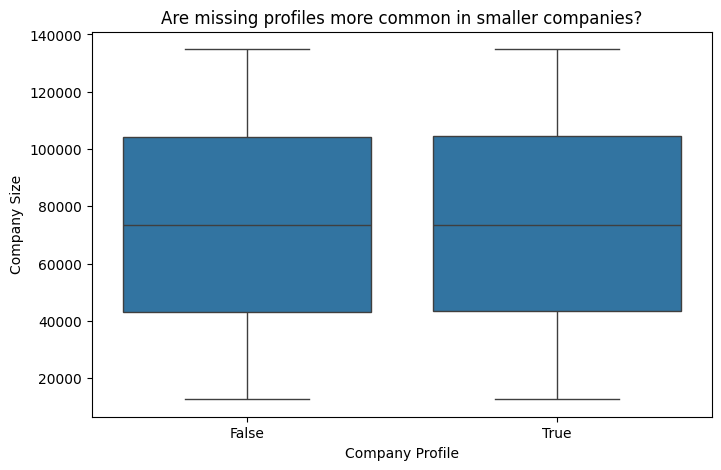

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Company Profile'].isnull(), y=df['Company Size'])
plt.title("Are missing profiles more common in smaller companies?")
plt.show()


Missing at random

Both big companies and small companies have a similar distibution of missing values.

In [360]:
# Group by Industry to check missing percentages
missing_by_industry = df.groupby("Industry")["Company Profile"].apply(lambda x: x.isnull().mean() * 100)
print("Missing percentage by Industry:\n", missing_by_industry.sort_values(ascending=False), "\n")

Missing percentage by Industry:
 Industry
Tech, Customer Service                           0.422202
Engineering & Design                             0.408634
Research & Science                               0.395389
Marketing & Sales, Research & Science            0.373599
Operations & Supply Chain, Customer Service      0.372555
Tech | Research & Science                        0.367985
Creative & Design                                0.365240
Customer Service                                 0.362400
Sales & Business Development                     0.357309
Finance, Operations & Supply Chain, Legal        0.356423
Tech                                             0.353509
Event Planning & Hospitality                     0.348783
Marketing & Sales                                0.345752
Finance                                          0.345097
Business                                         0.343777
Tech, Finance, Legal                             0.343464
Marketing                     

In [361]:
# Group by Job Automation Type to check missing percentages
missing_by_automation = df.groupby("Job Automation Type")["Company Profile"].apply(lambda x: x.isnull().mean() * 100)
print(" Missing percentage by Job Automation Type:\n", missing_by_automation.sort_values(ascending=False), "\n")


📌 Missing percentage by Job Automation Type:
 Job Automation Type
Easily Automatable    0.343110
Semi-Automatable      0.342827
Hard-to-Automate      0.332019
Name: Company Profile, dtype: float64 



There isn’t much difference in missing percentages across Industry and Job Automation Type. The type of missingness is most likely to be At Random.

In [362]:
#Replace missing values in Company profile with ' Unknown'
df['Company Profile'] = df['Company Profile'].fillna('Unknown')

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502792 entries, 0 to 1502791
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Experience                      1502792 non-null  object        
 1   Qualifications                  1502792 non-null  object        
 2   Salary Range                    1502792 non-null  object        
 3   Country                         1502792 non-null  object        
 4   Work Type                       1502792 non-null  object        
 5   Company Size                    1502792 non-null  int64         
 6   Job Posting Date                1502792 non-null  datetime64[ns]
 7   Preference                      1502792 non-null  object        
 8   Contact                         1502792 non-null  object        
 9   Job Title                       1502792 non-null  object        
 10  Role                            1502792 no

In [364]:
df.drop('Job_Automation_Type', axis=1, inplace=True)

In [366]:
df.drop('Industry_Job_Title',axis=1, inplace=True)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502792 entries, 0 to 1502791
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Experience                      1502792 non-null  object        
 1   Qualifications                  1502792 non-null  object        
 2   Salary Range                    1502792 non-null  object        
 3   Country                         1502792 non-null  object        
 4   Work Type                       1502792 non-null  object        
 5   Company Size                    1502792 non-null  int64         
 6   Job Posting Date                1502792 non-null  datetime64[ns]
 7   Preference                      1502792 non-null  object        
 8   Contact                         1502792 non-null  object        
 9   Job Title                       1502792 non-null  object        
 10  Role                            1502792 no

In [368]:
#save cleaned csv as job_description_cleaned
df.to_csv('job_description_cleaned.csv', index=False)
